In [1]:
pip install kaggle

     -------------------------------------- 83.6/83.6 kB 672.9 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for kaggle: filename=kaggle-1.5.16-py3-none-any.whl size=110686 sha256=593fa1d650e46887e66f7e9153847f5c54d47328a48b4773b47420c8d8b98592
  Stored in directory: c:\users\prajwal\appdata\local\pip\cache\wheels\d2\ed\a5\da3a0cfb13373d1ace41cafa4f2467d858c55c52473ba72799
Successfully built kaggle
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install datasets

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install transformers

In [4]:
pip install PyPDF2

Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [6]:
import sklearn
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import datasets
import transformers

In [7]:
#install all packages
!pip install tokenizer transformers scikit-learn pypdf==3.16.0 nltk pandarallel pandas==2.1.0 datasets #pyspark pyarrow

ERROR: Invalid requirement: '#pyspark'


In [8]:
!chmod 600 ~/.kaggle/kaggle.json

'chmod' is not recognized as an internal or external command,
operable program or batch file.


In [9]:
!kaggle datasets download -d snehaanbhawal/resume-dataset

Traceback (most recent call last):
  File "C:\Users\Prajwal\anaconda3\New folder\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\Prajwal\anaconda3\New folder\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\Prajwal\anaconda3\New folder\Scripts\kaggle.exe\__main__.py", line 4, in <module>
  File "C:\Users\Prajwal\anaconda3\New folder\lib\site-packages\kaggle\__init__.py", line 23, in <module>
    api.authenticate()
  File "C:\Users\Prajwal\anaconda3\New folder\lib\site-packages\kaggle\api\kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in C:\Users\Prajwal\.kaggle. Or use the environment method.


In [10]:
#resume_data=pd.read_csv("kaggle resume dataset filepath") change it accordingly
import os
resume_data=pd.read_csv("Resume.csv")
resume_data.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [11]:
resume_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           2484 non-null   int64 
 1   Resume_str   2484 non-null   object
 2   Resume_html  2484 non-null   object
 3   Category     2484 non-null   object
dtypes: int64(1), object(3)
memory usage: 77.8+ KB


In [12]:
resume_data.shape

(2484, 4)

In [13]:
resume_data['Category'].unique()

array(['HR', 'DESIGNER', 'INFORMATION-TECHNOLOGY', 'TEACHER', 'ADVOCATE',
       'BUSINESS-DEVELOPMENT', 'HEALTHCARE', 'FITNESS', 'AGRICULTURE',
       'BPO', 'SALES', 'CONSULTANT', 'DIGITAL-MEDIA', 'AUTOMOBILE',
       'CHEF', 'FINANCE', 'APPAREL', 'ENGINEERING', 'ACCOUNTANT',
       'CONSTRUCTION', 'PUBLIC-RELATIONS', 'BANKING', 'ARTS', 'AVIATION'],
      dtype=object)

In [14]:
# check how many resume are available in every category.
resume_data['Category'].value_counts()

INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
FINANCE                   118
ADVOCATE                  118
ACCOUNTANT                118
ENGINEERING               118
CHEF                      118
AVIATION                  117
FITNESS                   117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: Category, dtype: int64

In [15]:
len(resume_data['Category'].value_counts())

24

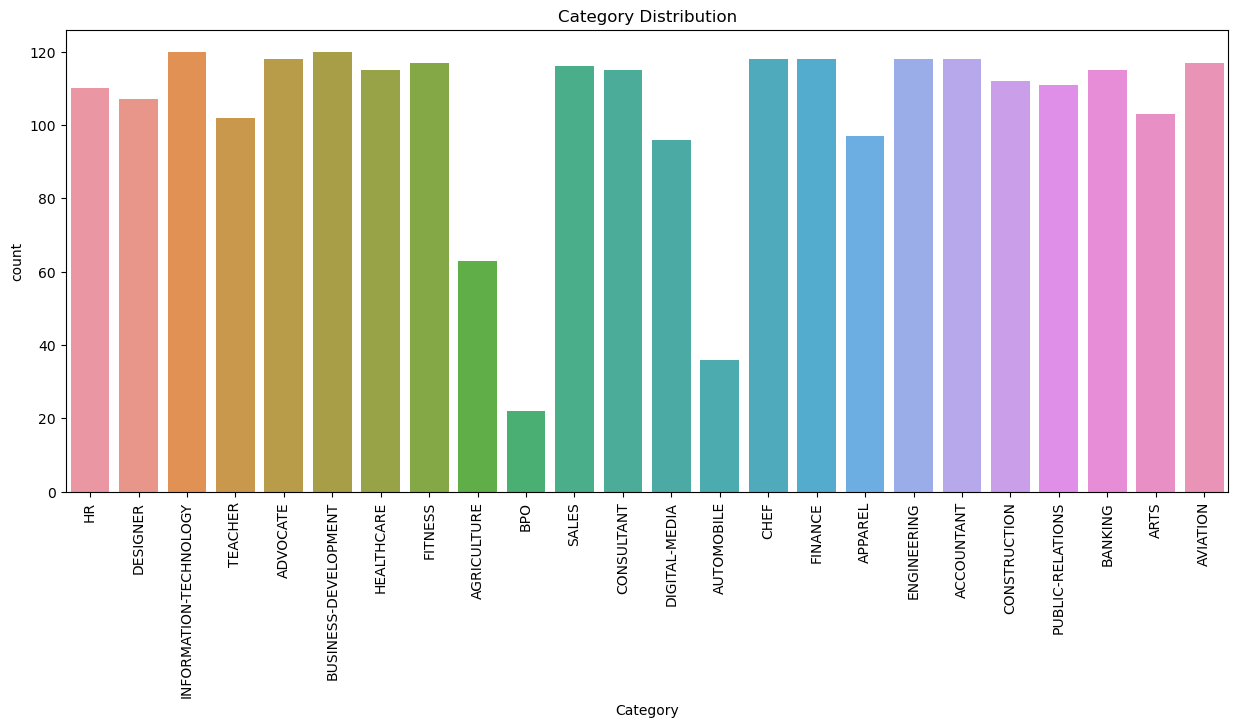

In [16]:
# Visualize the distribution of categories
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.figure(figsize=(15, 6))
sns.countplot(x=resume_data['Category'])
plt.xticks(rotation=90)
plt.title('Category Distribution')
plt.show()

In [17]:
from datasets import load_dataset

# Load the Hugging Face dataset for job descriptions
dataset = load_dataset('jacob-hugging-face/job-descriptions')

# Extract and comprehend 10-15 job descriptions
num_descriptions_to_extract = 15  # You can adjust this number as needed

# Loop through and print job descriptions
for i, description in enumerate(dataset['train']['job_description'][:num_descriptions_to_extract]):
    print(f"Job Description {i+1}:")
    print(description)
    print("="*50)  # Separator for readability

Using custom data configuration jacob-hugging-face--job-descriptions-e513dffdc3449e98


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset csv downloaded and prepared to C:/Users/Prajwal/.cache/huggingface/datasets/jacob-hugging-face___csv/jacob-hugging-face--job-descriptions-e513dffdc3449e98/0.0.0/6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

Job Description 1:
minimum qualifications
bachelors degree or equivalent practical experience years of experience in saas or productivity tools businessexperience managing enterprise accounts with sales cycles
preferred qualifications
 years of experience building strategic business partnerships with enterprise customersability to work through and with a reseller ecosystem to scale the businessability to plan pitch and execute a territory business strategyability to build relationships and to deliver results in a crossfunctionalmatrixed environmentability to identify crosspromoting and uppromoting opportunities within the existing account baseexcellent account management writtenverbal communication strategic and analyticalthinking skills
about the job
as a member of the google cloud team you inspire leading companies schools and government agencies to work smarter with google tools like google workspace search and chrome you advocate the innovative power of our products to make organiz

In [18]:
from transformers import DistilBertTokenizer, DistilBertModel
import torch
from sklearn.metrics.pairwise import cosine_similarity

In [19]:
# Tokenize and encode job descriptions and CVs
job_description= [...]  # List of job descriptions
cv_texts = [...]  # List of CV texts

In [20]:
from tokenizers import Tokenizer, models, pre_tokenizers, decoders, trainers
from transformers import AutoModel, AutoTokenizer
import torch

# Initialize a basic tokenizer
tokenizer = Tokenizer(models.BPE())

# Pre-tokenization
tokenizer.pre_tokenizer = pre_tokenizers.Whitespace()

# Post-processing
tokenizer.decoder = decoders.ByteLevel()

# Train the tokenizer on your data
description_texts = ["your description text 1", "your description text 2"]
cv_texts = ["your CV text 1", "your CV text 2"]

all_texts = description_texts + cv_texts

trainer = trainers.BpeTrainer(special_tokens=["[PAD]", "[CLS]", "[SEP]", "[MASK]", "[UNK]"])
tokenizer.train_from_iterator(all_texts, trainer=trainer)

# Initialize the transformer model and tokenizer
model_name = "bert-base-uncased"  # Replace with the desired model name
model = AutoModel.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)


# Encode the description and CV texts
description_encoded = tokenizer(description_texts, padding=True, truncation=True, return_tensors="pt", max_length=128)
cv_texts_encoded = tokenizer(cv_texts, padding=True, truncation=True, return_tensors="pt", max_length=128)

# Get embeddings
job_descriptions_embeddings = model(**description_encoded).last_hidden_state.mean(dim=1)
cv_texts_embeddings = model(**cv_texts_encoded).last_hidden_state.mean(dim=1)

# Now you have embeddings for your description and CV texts

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

C:\Users\Prajwal\anaconda3\New folder\lib\site-packages\huggingface_hub\file_download.py:127: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Prajwal\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [21]:
# Calculate cosine similarity

from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Assuming you have two PyTorch tensors: job_descriptions_embeddings and cv_texts_embeddings
# Detach the tensors and convert them to NumPy arrays
job_descriptions_array = job_descriptions_embeddings.detach().numpy()
cv_texts_array = cv_texts_embeddings.detach().numpy()

# Calculate cosine similarity
similarity_matrix = cosine_similarity(job_descriptions_array, cv_texts_array)

In [24]:
# Rank CVs based on similarity for each job description
top_candidates = []
for i, job_description in enumerate(job_description):
    similarities = similarity_matrix[i]
    sorted_indices = similarities.argsort()[::-1]  # Sort in descending order
    top_candidates.append(sorted_indices[:5])  # Get top 5 candidates

In [25]:
# Print top candidates for each job description
for i, candidates in enumerate(top_candidates):
    print(f"Job Description {i + 1} - Top Candidates:")
    for candidate_idx in candidates:
        print(f"CV Index: {candidate_idx}, Similarity: {similarity_matrix[i][candidate_idx]}")

Job Description 1 - Top Candidates:
CV Index: 0, Similarity: 0.883575439453125
CV Index: 1, Similarity: 0.8675036430358887
